# Лабораторная работа №4
## Оценка влияния источника излучения на координаты цвета
### Цель
Изучить спектральные характеристики источников излучения и объектов, получить навыки расчета координат цвета.

In [1]:
import pandas as pd 
import numpy as np 
import os 
import math
import cv2
import matplotlib.pyplot as plt


In [2]:
list_path_illuminat = [
'SDS/illuminant A.csv',
'SDS/illuminant D50.csv',
'SDS/illuminant FL7.csv',
]

In [3]:
path_cie_xyz = 'SDS\CIE_xyz_1931_2deg_5nm.csv'
path_colorchecker = 'SDS\colorcheckerdata.csv'

In [4]:
df_cie_xyz =pd.read_csv(path_cie_xyz) 

In [5]:
df_cie_xyz

,lamda,x,y,z
0,380,0.001368,0.000039,0.00645
1,385,0.002236,0.000064,0.01055
2,390,0.004243,0.000120,0.02005
3,395,0.007650,0.000217,0.03621
4,400,0.014310,0.000396,0.06785
...,...,...,...,...
76,760,0.000166,0.000060,0.00000
77,765,0.000117,0.000042,0.00000
78,770,0.000083,0.000030,0.00000
79,775,0.000059,0.000021,0.00000


In [6]:
df_colorcheck = pd.read_csv(path_colorchecker) 

In [7]:
df_colorcheck

,wavelength,black 2 (1.5 D),blue,blue flower,blue sky,bluish green,cyan,dark skin,foliage,green,...,neutral 6.5 (.44 D),neutral 8 (.23 D),orange,orange yellow,purple,purplish blue,red,white 9.5 (.05 D),yellow,yellow green
0,380.0,0.032,0.069,0.123,0.113,0.110,0.093,0.048,0.048,0.055,...,0.138,0.150,0.053,0.060,0.101,0.099,0.052,0.153,0.054,0.056
1,385.0,0.033,0.081,0.152,0.138,0.133,0.110,0.051,0.049,0.056,...,0.167,0.184,0.054,0.061,0.115,0.120,0.052,0.189,0.053,0.058
2,390.0,0.033,0.096,0.197,0.174,0.167,0.134,0.055,0.049,0.057,...,0.206,0.235,0.054,0.063,0.135,0.150,0.052,0.245,0.054,0.059
3,395.0,0.034,0.114,0.258,0.219,0.208,0.164,0.060,0.049,0.058,...,0.249,0.299,0.054,0.064,0.157,0.189,0.052,0.319,0.053,0.059
4,400.0,0.035,0.136,0.328,0.266,0.252,0.195,0.065,0.050,0.058,...,0.289,0.372,0.054,0.065,0.177,0.231,0.051,0.409,0.053,0.060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,760.0,0.032,0.138,0.517,0.106,0.297,0.176,0.462,0.368,0.110,...,0.329,0.555,0.641,0.700,0.492,0.242,0.728,0.882,0.782,0.433
77,765.0,0.032,0.154,0.515,0.107,0.301,0.191,0.465,0.368,0.111,...,0.328,0.554,0.639,0.698,0.495,0.259,0.727,0.881,0.781,0.436
78,770.0,0.032,0.168,0.500,0.110,0.297,0.200,0.448,0.355,0.112,...,0.327,0.553,0.616,0.673,0.482,0.275,0.702,0.880,0.752,0.426
79,775.0,0.032,0.186,0.491,0.115,0.296,0.208,0.432,0.346,0.112,...,0.326,0.551,0.598,0.653,0.471,0.294,0.680,0.880,0.728,0.413


In [8]:
df_D50 = pd.read_csv(list_path_illuminat[0])

## Поток излучения ##

In [9]:
def calc_FI(df_B: pd.DataFrame, df_L: pd.DataFrame, name_B) -> pd.DataFrame:
    step  = 5  
    FI_val = (df_B[name_B] * df_L['value'] * step).tolist()
    df_FI = pd.DataFrame({'wavelength': df_B['wavelength'].tolist(), 'value': FI_val })
    return df_FI

## Координаты XYZ


In [10]:
def calc_XYZ(df_FI: pd.DataFrame, df_cie_xyz: pd.DataFrame, df_L: pd.DataFrame)->pd.DataFrame:
    step = 5
    x_ = (df_FI['value'][:71]* df_cie_xyz['x'][:71]).sum() * step
    y_ = (df_FI['value'][:71]* df_cie_xyz['y'][:71]).sum() * step
    z_ = (df_FI['value'][:71]* df_cie_xyz['z'][:71]).sum() * step
    
    y_k = (df_L['value'][:71]* df_cie_xyz['y'][:71]).sum()* step
    k = 100/y_

    X  = k*x_
    Y  = k*y_
    Z  = k*z_

    return round(X/255, 3), round(Y/255, 3), round(Z/255, 3)
    

## Координаты CIELAB

In [11]:
def calc_CIE_Lab(df_B: pd.DataFrame, df_cie_xyz: pd.DataFrame, df_L: pd.DataFrame, name_B):
    def f(t):
        if (t > (6 / 29) ** 3):
            return t ** (1/3)
        else:
            return (1/3) * ((26/9) ** 2) * t + (4/29)

    def calc_FI_(df_B: pd.DataFrame, name_B) -> pd.DataFrame:
        step  = 5  
        FI_val = (df_B[name_B] * 1 * step).tolist()
        df_FI = pd.DataFrame({'wavelength': df_B['wavelength'].tolist(), 'value': FI_val })
        return df_FI
    
    X, Y, Z = calc_XYZ(calc_FI(df_B,df_L, name_B),df_cie_xyz, df_L)
    X_n, Y_n, Z_n = calc_XYZ(calc_FI_(df_B, name_B), df_cie_xyz, df_L)
    L = 116 * f(Y / Y_n) - 16
    a = 500 * (f(X / X_n) - f(Y / Y_n))
    b = 200 * (f(Y / Y_n) - f(Z / Z_n))

    return round(L,3), round(a,3), round(b,3)

## Координаты RGB

In [12]:
def calc_SRGB(x, y, z):
    s = np.array([[3.2404542, -1.5371385, -0.4985314], 
                 [-0.9692660,  1.8760108,  0.0415560],
                 [0.0556434, -0.2040259,  1.0572252]])
    xyz = np.array([[x, y, z]])
    rgb = np.matmul(s, xyz.T)
    return round(rgb[0][0], 3) , round(rgb[1][0], 3),round(rgb[2][0], 3)

##  𝑅, 𝐺, 𝐵 составить изображение с отображением полей

In [13]:
def get_rectangle(color: tuple)->np.array:
    new_color = [abs(round(i*255)) if i*255<255 else 255 for i in color]
    mat = np.zeros((60,60,3))
    mat = cv2.rectangle(mat, (0,0), (60,60), new_color, -1)
    return mat.astype(np.int32)

In [14]:
from colormath.color_diff import delta_e_cie1976

## Рассчет координат 𝑋, 𝑌, 𝑍, 𝐿*, 𝑎*, 𝑏* и 𝑅, 𝐺, 𝐵 по трем любым источникам cвета для 4 полей полей тест-объекта ColorChecker


In [15]:
def create_palette(list_path_illuminat: list[str], path_color_cheker: str, path_CIE_xyz):
    
    df_cie_xyz =pd.read_csv(path_CIE_xyz) 
    df_colorcheck = pd.read_csv(path_color_cheker) 
    names = ['foliage', 'green', 'blue', 'cyan']
    df_list = []
    for j, path_illuminat in enumerate(list_path_illuminat):
        df_illuminat = pd.read_csv(path_illuminat)
        f  = plt.figure(figsize=(60,60))
        df_ill = pd.DataFrame(columns=['color','XYZ','Lab', 'RGB'])
        
        print(path_illuminat)
        for i, name in enumerate(names):
            df_FI = calc_FI(df_colorcheck, df_illuminat, name)
            x, y, z = calc_XYZ(df_FI, df_cie_xyz, df_illuminat)
            L, a, b = calc_CIE_Lab(df_colorcheck,df_cie_xyz, df_illuminat, name)
            color = calc_SRGB(x, y, z)
            df_new =  pd.DataFrame([{'color':name,'XYZ':(x, y, z),'Lab':(L, a, b), 'RGB':color}])
            df_ill = pd.concat([df_ill, df_new],ignore_index=True)
            mat = get_rectangle(color)
            f.add_subplot(j+1,13, i+1)
            plt.grid(False)
            plt.imshow(mat)
        df_list.append(df_ill)
        print(df_ill)
        plt.show()
    return df_list
        

In [16]:
pd.options.display.expand_frame_repr = False

SDS/illuminant A.csv
     color                    XYZ                       Lab                    RGB
0  foliage  (0.375, 0.392, 0.072)   (100.0, 24.967, 54.241)  (0.577, 0.375, 0.017)
1    green  (0.293, 0.392, 0.064)   (100.0, 24.382, 48.417)  (0.315, 0.454, 0.004)
2     blue   (0.449, 0.392, 0.72)  (100.0, -28.664, 52.006)   (0.493, 0.33, 0.706)
3     cyan  (0.294, 0.392, 0.327)   (100.0, -1.129, 47.596)  (0.187, 0.464, 0.282)


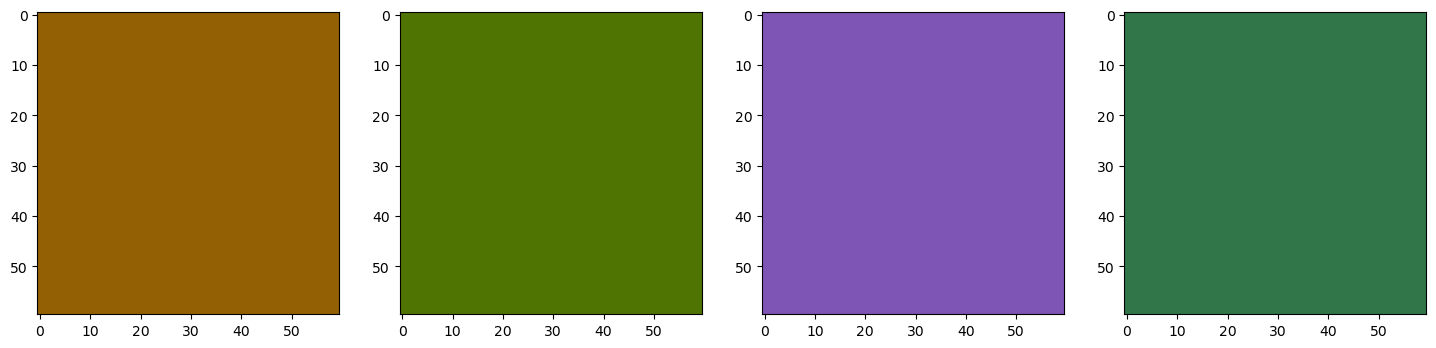

SDS/illuminant D50.csv
     color                    XYZ                       Lab                    RGB
0  foliage  (0.316, 0.392, 0.156)    (100.0, -4.15, 11.389)  (0.344, 0.436, 0.103)
1    green  (0.249, 0.392, 0.126)   (100.0, -3.303, 10.017)  (0.141, 0.499, 0.067)
2     blue  (0.486, 0.392, 1.503)  (100.0, -16.057, 10.858)  (0.223, 0.327, 1.536)
3     cyan  (0.276, 0.392, 0.629)  (100.0, -11.525, 10.461)   (-0.022, 0.494, 0.6)


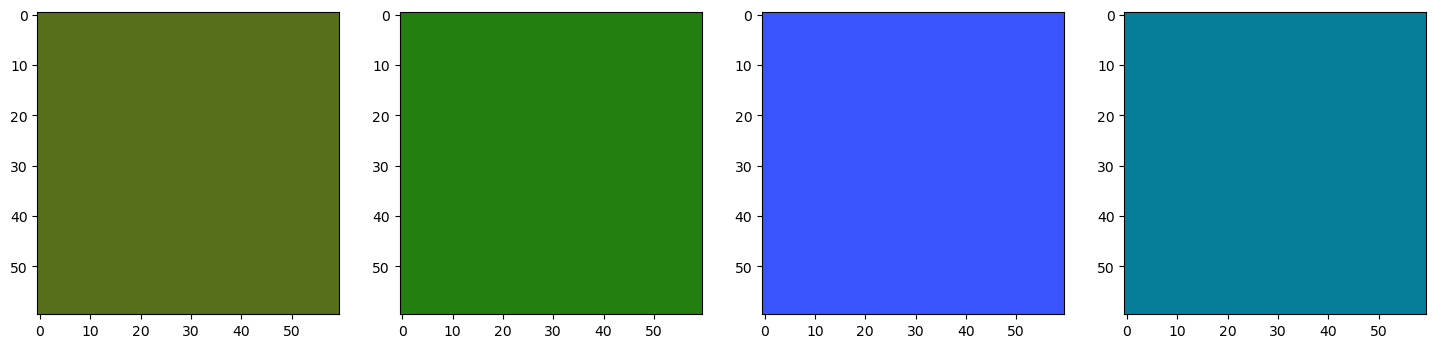

SDS/illuminant FL7.csv
     color                    XYZ                       Lab                     RGB
0  foliage  (0.303, 0.392, 0.196)  (100.0, -11.045, -3.522)    (0.282, 0.45, 0.144)
1    green   (0.244, 0.392, 0.15)    (100.0, -6.65, -1.351)   (0.113, 0.505, 0.092)
2     blue  (0.551, 0.392, 1.937)    (100.0, 4.621, -5.831)   (0.217, 0.282, 1.999)
3     cyan  (0.296, 0.392, 0.781)      (100.0, 0.0, -3.719)  (-0.033, 0.481, 0.762)


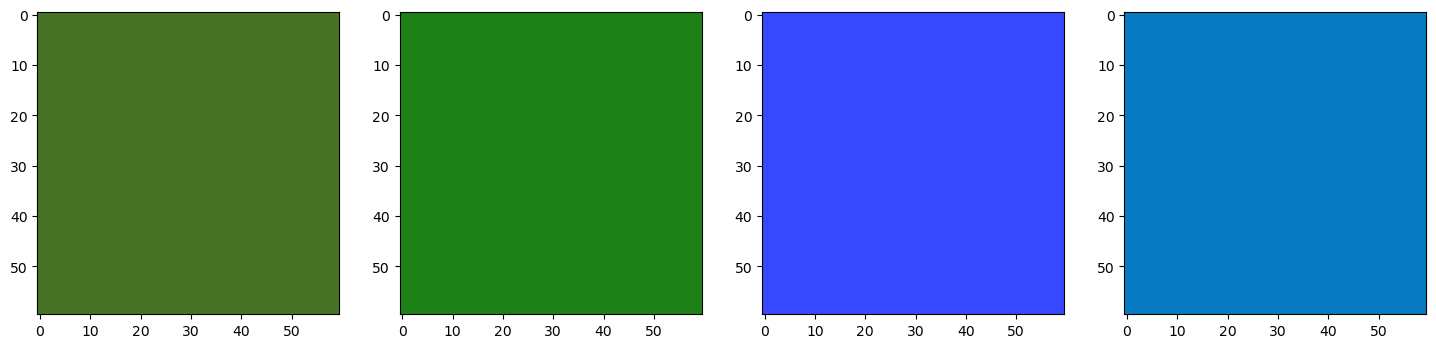

In [17]:
df_list = create_palette(list_path_illuminat, path_colorchecker, path_cie_xyz)

In [186]:
from colormath.color_objects import LabColor

## Рассчитать цветового различия ∆𝐸76 по координатам 𝐿 *, 𝑎*, 𝑏*


In [190]:
for i in range(4):
    color = ''
    lab =  []
    for df in df_list:
        color = df.iloc[i][0]
        lab.append(df.iloc[i][2])
    print(color)
    print('illuminant A - illuminant D50:   ∆𝐸76 =',delta_e_cie1976(LabColor(*lab[0]), LabColor(*lab[1])))
    print('illuminant D50 - illuminant FL7: ∆𝐸76 =', delta_e_cie1976(LabColor(*lab[1]), LabColor(*lab[2])))
    print('illuminant FL7 - illuminant A:   ∆𝐸76 =',delta_e_cie1976(LabColor(*lab[2]), LabColor(*lab[0])))
    print()

foliage
illuminant A - illuminant D50:   ∆𝐸76 = 51.8082386595028
illuminant D50 - illuminant FL7: ∆𝐸76 = 16.427992756268186
illuminant FL7 - illuminant A:   ∆𝐸76 = 68.0692905281082

green
illuminant A - illuminant D50:   ∆𝐸76 = 47.33940456955495
illuminant D50 - illuminant FL7: ∆𝐸76 = 11.850478176006233
illuminant FL7 - illuminant A:   ∆𝐸76 = 58.65013936897337

blue
illuminant A - illuminant D50:   ∆𝐸76 = 43.035965807682295
illuminant D50 - illuminant FL7: ∆𝐸76 = 26.572587472807385
illuminant FL7 - illuminant A:   ∆𝐸76 = 66.73087586717261

cyan
illuminant A - illuminant D50:   ∆𝐸76 = 38.56274161674711
illuminant D50 - illuminant FL7: ∆𝐸76 = 18.27287675764273
illuminant FL7 - illuminant A:   ∆𝐸76 = 51.327418267432854



**Вывод**

В результате выполнения лабораторной работы были рассчитаны координаты цвета при разных источниках излучения.
Был проведен расчет ∆𝐸76 для 3-х источников излучения относительно 4-х полей тест-объекта, самое большое цветово различие наблюдается при  
illuminant FL7 - illuminant A, а минимальное при illuminant D50 - illuminant FL7, при отображении RGB координат, также субъективно отличаются оттенки цвета.
